# 圖形辨識紀錄 人臉測試一 Gakki~~~~

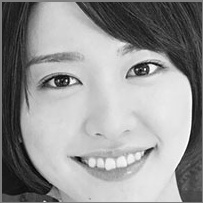

In [10]:
from IPython.display import Image
Image(filename='./199.jpg', width=200,height=200)

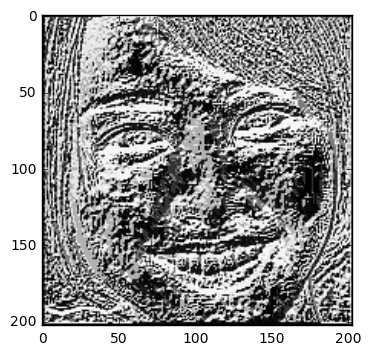

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

image = mpimg.imread('./199.jpg')
#一般LBP
def normal_LBP(image):
    lbp=np.zeros(image.shape, np.uint8)
    for x in range(1,image[0].size-1):
        for y in range(1,image[1].size-1):
            n=0
            if (image[x-1,y-1]>image[x,y]):
                n+=1;
            if (image[x-1,y]>image[x,y]):
                n+=2;
            if (image[x-1,y+1]>image[x,y]):
                n+=4;
            if (image[x,y-1]>image[x,y]):
                n+=8;
            if (image[x,y+1]>image[x,y]):
                n+=16;
            if (image[x+1,y-1]>image[x,y]):
                n+=32;
            if (image[x+1,y]>image[x,y]):
                n+=64;
            if (image[x+1,y+1]>image[x,y]):
                n+=128;
            lbp[x][y]=n
    return lbp

lbp=normal_LBP(image)
plt.imshow(lbp,cmap='Greys_r')

*參考:https://github.com/michael92ht/LBP


In [12]:
uniform_map={0:0,1:1,2:2,3:3,4:4,6:5,7:6,8:7,12:8,
            14:9,15:10,16:11,24:12,28:13,30:14,31:15,32:16,
            48:17,56:18,60:19,62:20,63:21,64:22,96:23,112:24,
            120:25,124:26,126:27,127:28,128:29,129:30,131:31,135:32,
            143:33,159:34,191:35,192:36,193:37,195:38,199:39,207:40,
            223:41,224:42,225:43,227:44,231:45,239:46,240:47,241:48,
            243:49,247:50,248:51,249:52,251:53,252:54,253:55,254:56,
            255:57}

In [13]:

#获取值r的二进制中1的位数
def calc_sum(r):
    num=0
    while(r):
        r&=(r-1)
        num+=1
    return num
#获取图像的LBP等价模式特征
def lbp_uniform(image_array):
    uniform_array=np.zeros(image_array.shape, np.uint8)
    basic_array=image_array
    width=image_array.shape[0]
    height=image_array.shape[1]
    for i in range(1,width-1):
        for j in range(1,height-1):
            k= basic_array[i,j]<<1
            if k>255:
                k=k-255
            xor=basic_array[i,j]^k
            num=calc_sum(xor)
            if num<=2:
                uniform_array[i,j]=uniform_map[basic_array[i,j]]
            else:
                uniform_array[i,j]=58
    return uniform_array

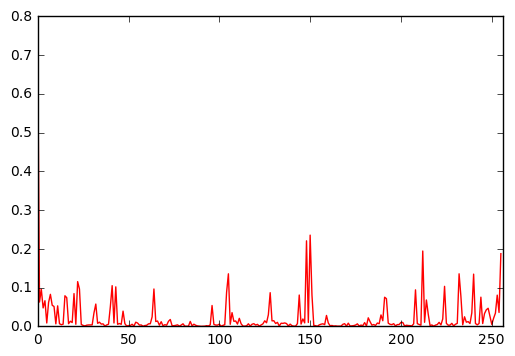

In [14]:
def show_hist(img_array,im_bins,im_range):
        hist = cv2.calcHist([img_array],[0],None,im_bins,im_range)
        hist = cv2.normalize(hist).flatten()
        plt.plot(hist,color = 'r')
        plt.xlim(im_range)
        plt.show()
#一般LBP分部圖
show_hist(lbp,[256],[0,256])

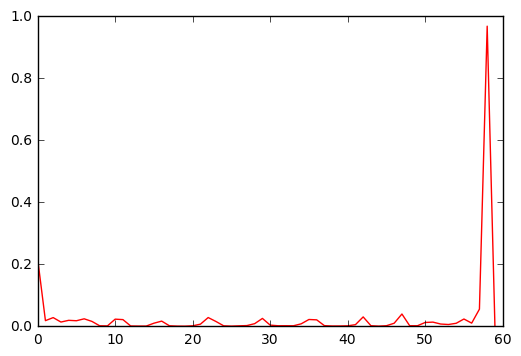

In [15]:
#正規化LBP分部圖
lbp_u=lbp_uniform(lbp)
show_hist(lbp_u,[60],[0,60])

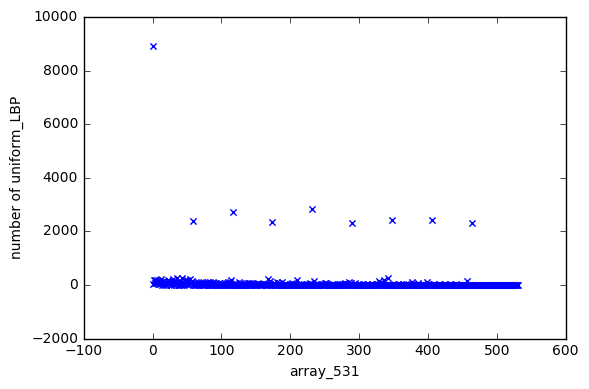

In [16]:
def split_lbp(lbp_u):
    x,y=lbp_u[0].size/3,lbp_u[1].size/3
    lbp_t=np.array([lbp_u[0:x,0:y],lbp_u[x:x*2,0:y],lbp_u[x*2:,0:y],lbp_u[0:x,y:y*2],lbp_u[x:x*2,y:y*2],lbp_u[x*2:,y:y*2],lbp_u[0:x,y*2:],lbp_u[x:x*2,y*2:],lbp_u[x*2:,y*2:]])
    lbp_r = np.zeros(shape=(9*59),dtype=int)
    for i in range(lbp_t.shape[0]):
        for j in range(lbp_t[i].shape[0]):
            for k in range(lbp_t[i].shape[1]):
                lbp_r[i*lbp_t[i][j,k]]+=1
    return lbp_r

lbp_r=split_lbp(lbp_u)
t=np.arange(lbp_r.size)
plt.scatter(t, lbp_r, marker='x')
plt.xlabel('array_531')
plt.ylabel('number of uniform_LBP')

plt.tight_layout()

plt.show()

### 多作一張來比較，接下來就是作分類學習了

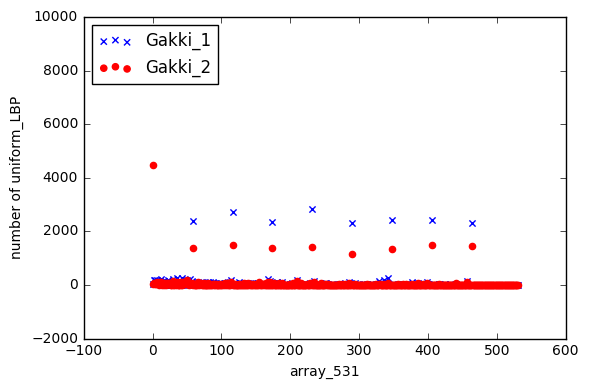

In [17]:
image=mpimg.imread('./199.jpg')
lbp=normal_LBP(image)
lbp_u=lbp_uniform(lbp)
lbp_r=split_lbp(lbp_u)
t=np.arange(lbp_r.size)
plt.scatter(t, lbp_r,color='blue', marker='x',label='Gakki_1')
#--------------------------------------------------------------------------
image=mpimg.imread('./200.jpg')
lbp=normal_LBP(image)
lbp_u=lbp_uniform(lbp)
lbp_r=split_lbp(lbp_u)
t=np.arange(lbp_r.size)
plt.scatter(t, lbp_r, color='red',marker='o',label='Gakki_2')
#--------------------------------------------------------------------------
plt.xlabel('array_531')
plt.ylabel('number of uniform_LBP')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()